Importing Libraries

In [2]:
import numpy as np
import cv2
import pickle
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt


Using TensorFlow backend.


Importing Images.

Fetching Images

In [1]:
path = "N:/fruits/fruits-360/Training"

In [5]:
images = []
classno = []
nos = len(os.listdir(path))
count = 0

print("number of classes")
print("getting images:")

for x in range(0,nos):
    pictures = os.listdir(path+"/"+str(count))
    for y in pictures:
        current = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(current)
        classno.append(count)
    print(count, end = " ")
    count+=1
print(" ")

np_images = np.array(images)
np_class = np.array(classno)

number of classes
getting images:
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52  


Splitting data for training and testing.

In [78]:
x_train,x_test,y_train,y_test = train_test_split(np_images,np_class,test_size=0.2)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.2)

Pre-process the image

In [80]:
def preprocess(img):
    img = cv2.resize(img,(28,28))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

In [81]:
x_train = np.array(list(map(preprocess,x_train)))
x_test = np.array(list(map(preprocess,x_test)))
x_valid = np.array(list(map(preprocess,x_valid)))

Changing the dimensions for input.

In [82]:
x_train = x_train.reshape(18086,28,28,1)
x_test = x_test.reshape(5652,28,28,1)
x_valid = x_valid.reshape(4522,28,28,1)


Performing augmentation.

In [83]:
imgen = ImageDataGenerator(width_shift_range=0.1,
                          height_shift_range=0.1,
                          zoom_range=0.2,
                          shear_range=0.1,
                          rotation_range=10)
imgen.fit(x_train)

In [86]:
batch = imgen.flow(x_train,y_train,batch_size=20)
x_batch, y_batch = next(batch)

One hot encoding.

In [88]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

Building the model.

In [90]:
def mymodel():
    
    model = Sequential()
    
    model.add(Convolution2D(68,(5,5),activation='relu',input_shape=(28,28,1)))
    model.add(Convolution2D(60,(5,5),activation='relu'))
    #model.add(Convolution2D(8,(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    
    model.add(Convolution2D(35,(3,3),activation='relu'))
    model.add(Convolution2D(35,(3,3),activation='relu'))
    #model.add(Convolution2D(8,(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    
    model.add(Flatten())
    model.add(Dense(400,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(53,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    

In [91]:
modd = mymodel()
print(modd.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 24, 24, 68)        1768      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 20, 20, 60)        102060    
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 10, 10, 60)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 8, 8, 35)          18935     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 6, 6, 35)          11060     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 3, 3, 35)          0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 3, 3, 35)        

Training the model.

In [95]:
history = modd.fit_generator(imgen.flow(x_train,y_train,batch_size=20),
                             steps_per_epoch = len(x_train),
                             epochs=10,
                             validation_data = (x_valid,y_valid),
                             shuffle=1)

Epoch 1/10
18086/18086 [==============================] - 388s 21ms/step - loss: 0.7319 - accuracy: 0.7546 - val_loss: 0.1713 - val_accuracy: 0.9436
Epoch 2/10
18086/18086 [==============================] - 383s 21ms/step - loss: 0.5355 - accuracy: 0.8225 - val_loss: 0.0841 - val_accuracy: 0.9752
Epoch 3/10
18086/18086 [==============================] - 385s 21ms/step - loss: 0.4732 - accuracy: 0.8456 - val_loss: 0.0874 - val_accuracy: 0.9728
Epoch 4/10
18086/18086 [==============================] - 384s 21ms/step - loss: 0.4425 - accuracy: 0.8581 - val_loss: 0.0789 - val_accuracy: 0.9783
Epoch 5/10
18086/18086 [==============================] - 384s 21ms/step - loss: 0.4227 - accuracy: 0.8662 - val_loss: 0.0735 - val_accuracy: 0.9777
Epoch 6/10
18086/18086 [==============================] - 385s 21ms/step - loss: 0.4126 - accuracy: 0.8716 - val_loss: 0.1264 - val_accuracy: 0.9648
Epoch 7/10
18086/18086 [==============================] - 387s 21ms/step - loss: 0.4017 - accuracy: 0.8762

Evaluating the results.

In [96]:
score = modd.evaluate(x_test,y_test)
print("loss:",score[0])
print("accuarcy:",score[1])

5652/5652 [==============================] - 2s 313us/step
loss: 0.05757816390827119
accuarcy: 0.9815994501113892


Saving the model.

In [98]:
pick = open("ready_fr.p","wb")
pickle.dump(modd,pick)
pick.close()
cv2.waitKey(0)

-1

Visualizing the results.

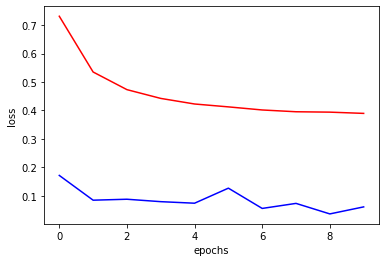

In [99]:
plt.figure(0)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

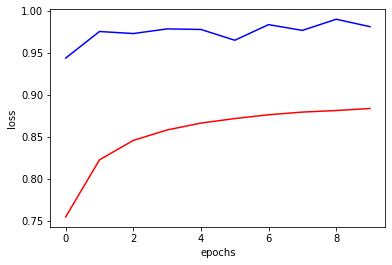

In [101]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Testing the model.

In [102]:
y_pred=modd.predict(x_test)

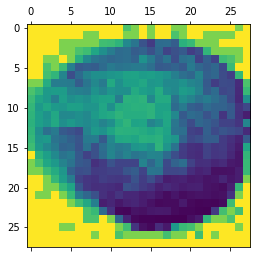

In [115]:
plt.matshow(x_test[5].reshape(28,28))

In [116]:
np.argmax(y_pred[5])

27

Also you can try hyper parameter tuning for getting better results.
Using a GPU will decreases the training time.